In [109]:
# Installed packages
import pandas as pd


# Our package
from ExploriPy import EDA

In [147]:
df = pd.read_csv('data/LoanPrediction.csv')

In [148]:
def get_data_summary(df):
    '''Generate important summary information of a given
    Pandas DataFrame'''
    
    print("========== Information globale ==========")
    display(df.info())
    print("\n========== Comptage des Valeurs Sans doublon ==========\n")
    display(df.nunique())
    print("\n============ Statistiques Descriptives ===========================")
    display(df.describe())
    print("\n=======================================")
    display(df.head(5).style.background_gradient(cmap="viridis"))

In [149]:
get_data_summary(df)

========== Information globale ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None


========== Comptage des Valeurs Sans doublon ==========



Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


============ Statistiques Descriptives ===========================


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [150]:
def missing_value(df):
  d1 = df.isna().sum().to_frame()
  d2 = (df.isna().sum() / df.shape[0]).to_frame()
  d3 = df.dtypes.to_frame()
  df_missing = pd.concat([d1,d2,d3],axis = 1)
  df_missing.columns = ['missing value','% of missing value','dtypes']
  print('='*100)
  if (df_missing.iloc[:,0].any() !=0):
      print("Notre dataframe comporte " + str(df.shape[1]) +
      " colonnes. Et il y a " + str(df_missing.shape[1]) + " colonnes qui ont des valeurs manquantes.")
  else:
      print("Notre dataframe comporte " + str(df.shape[1]) +
      " colonnes. Et il n'y a aucune colonne qui à des valeurs manquantes.")
  print('-'*100)
  print(df_missing)

In [151]:
missing_value(df)

Notre dataframe comporte 13 colonnes. Et il y a 3 colonnes qui ont des valeurs manquantes.
----------------------------------------------------------------------------------------------------
                   missing value  % of missing value   dtypes
Loan_ID                        0            0.000000   object
Gender                        13            0.021173   object
Married                        3            0.004886   object
Dependents                    15            0.024430   object
Education                      0            0.000000   object
Self_Employed                 32            0.052117   object
ApplicantIncome                0            0.000000    int64
CoapplicantIncome              0            0.000000  float64
LoanAmount                    22            0.035831  float64
Loan_Amount_Term              14            0.022801  float64
Credit_History                50            0.081433  float64
Property_Area                  0            0.000000   object
Lo

In [152]:
df = df.drop_duplicates(inplace=False)

In [156]:
cat = ['Property_Area', 'Loan_Status','Married']

Converting Categorical Features to String...


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Initiating Target Specific Analysis...
Generating Correlation Heatmap...
Calculating Target Percentage...
Performing ChiSquare Test of Independence...


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 73.67it/s]


Calculate the Target Distributions...


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 28.54it/s]


Generating Distribution Charts...


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


IndexError: list index out of range

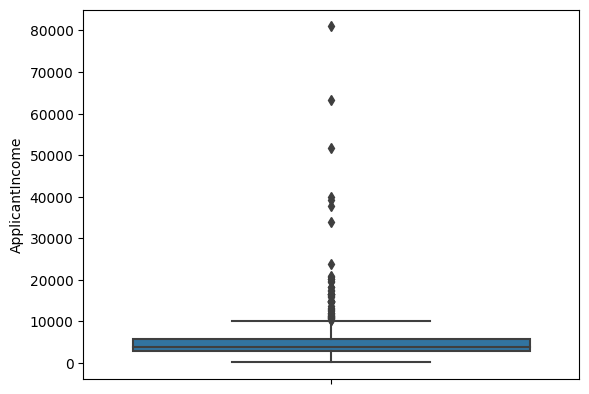

In [157]:
eda = EDA(df, cat,  title='Exploratory Data Analysis for Big Mart Sales III - Based on Item_Outlet_Sales')
eda.TargetAnalysis('Married') # For Target Specific Analysis